## Einleitung

Dieses Notebook demonstriert die grundlegende Datenexploration für das PRECISION-Projekt.

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting-Einstellungen
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# PRECISION Farbpalette
PRECISION_COLORS = {
    'primary': '#005a8c',
    'secondary': '#007cb0',
    'accent': '#00a0d2',
    'success': '#4a9b5e',
    'warning': '#e8a027',
    'danger': '#c9302c'
}

print('Setup erfolgreich!')

Setup erfolgreich!


## 1. Daten laden

In [4]:
# Seed für Reproduzierbarkeit
np.random.seed(42)

# Synthetische Patientendaten erstellen
n_patients = 200

data = {
    'patient_id': [f'PAT_{i:04d}' for i in range(1, n_patients + 1)],
    'age': np.random.normal(55, 15, n_patients).astype(int).clip(18, 90),
    'gender': np.random.choice(['M', 'F'], n_patients, p=[0.52, 0.48]),
    'bmi': np.random.normal(26, 5, n_patients).round(1).clip(15, 45),
    'blood_pressure_sys': np.random.normal(130, 20, n_patients).astype(int).clip(90, 200),
    'blood_pressure_dia': np.random.normal(80, 12, n_patients).astype(int).clip(50, 120),
    'cholesterol': np.random.normal(200, 40, n_patients).round(0).clip(100, 350),
    'glucose': np.random.normal(100, 25, n_patients).round(0).clip(60, 250),
    'treatment_group': np.random.choice(['A', 'B', 'Placebo'], n_patients, p=[0.4, 0.4, 0.2]),
    'response': np.random.choice([0, 1], n_patients, p=[0.35, 0.65])
}

df = pd.DataFrame(data)
print(f'Datensatz erstellt: {len(df)} Patienten')

Datensatz erstellt: 200 Patienten


## 2. Datenübersicht

In [5]:
# Erste Zeilen anzeigen
df.head(10)

,patient_id,age,gender,bmi,blood_pressure_sys,blood_pressure_dia,cholesterol,glucose,treatment_group,response
0,PAT_0001,62,F,25.5,147,110,208.0,65.0,A,1
1,PAT_0002,52,F,28.0,123,78,228.0,60.0,B,1
2,PAT_0003,64,F,29.5,154,93,196.0,126.0,B,0
3,PAT_0004,77,F,24.0,121,71,258.0,161.0,Placebo,1
4,PAT_0005,51,M,27.1,90,79,173.0,135.0,A,1
5,PAT_0006,51,M,26.1,109,101,272.0,114.0,B,1
6,PAT_0007,78,F,26.5,92,72,198.0,115.0,A,1
7,PAT_0008,66,F,22.1,122,101,143.0,121.0,A,1
8,PAT_0009,47,F,26.1,130,88,205.0,119.0,B,0
9,PAT_0010,63,F,28.5,163,73,173.0,107.0,B,1


In [6]:
# Statistische Zusammenfassung
df.describe()

,age,bmi,blood_pressure_sys,blood_pressure_dia,cholesterol,glucose,response
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,53.875000,25.774500,128.965000,81.775000,204.770000,99.925000,0.640000
std,13.822252,5.037637,20.074078,11.163219,41.046451,23.566209,0.481205
min,18.000000,15.000000,90.000000,53.000000,100.000000,60.000000,0.000000
25%,44.000000,22.175000,114.750000,73.000000,179.750000,82.000000,0.000000
50%,54.500000,25.700000,129.000000,82.000000,205.000000,100.500000,1.000000
75%,62.000000,28.950000,143.000000,88.000000,234.000000,114.000000,1.000000
max,90.000000,41.400000,182.000000,110.000000,296.000000,164.000000,1.000000


In [7]:
# Datentypen und fehlende Werte
print('Datentypen:')
print(df.dtypes)
print('\nFehlende Werte:')
print(df.isnull().sum())

Datentypen:
patient_id             object
age                     int64
gender                 object
bmi                   float64
blood_pressure_sys      int64
blood_pressure_dia      int64
cholesterol           float64
glucose               float64
treatment_group        object
response                int64
dtype: object

Fehlende Werte:
patient_id            0
age                   0
gender                0
bmi                   0
blood_pressure_sys    0
blood_pressure_dia    0
cholesterol           0
glucose               0
treatment_group       0
response              0
dtype: int64


## 3. Visualisierungen

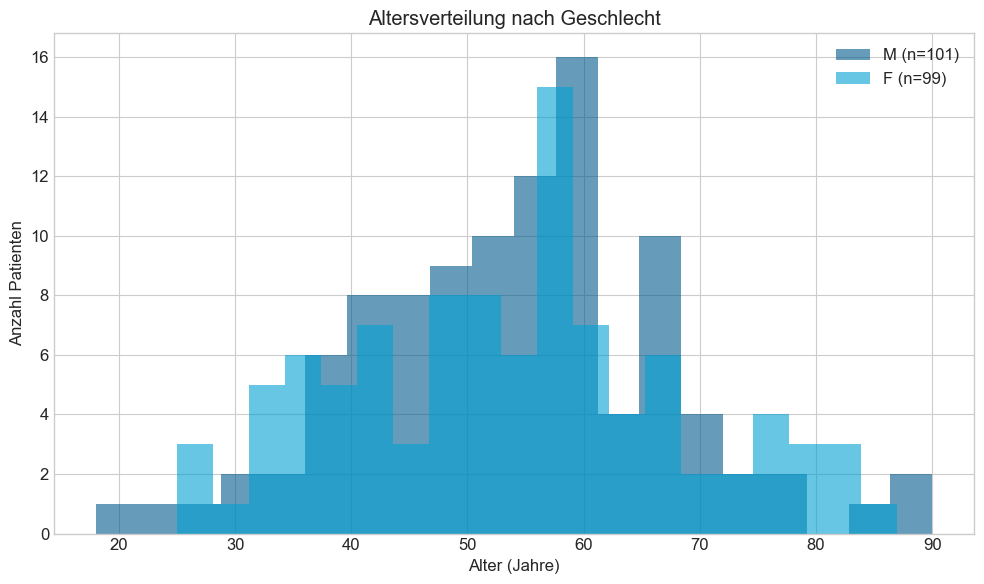

In [8]:
#| label: fig-age-distribution
#| fig-cap: "Altersverteilung nach Geschlecht"

fig, ax = plt.subplots(figsize=(10, 6))

for gender, color in [('M', PRECISION_COLORS['primary']), ('F', PRECISION_COLORS['accent'])]:
    subset = df[df['gender'] == gender]
    ax.hist(subset['age'], bins=20, alpha=0.6, label=f'{gender} (n={len(subset)})', color=color)

ax.set_xlabel('Alter (Jahre)')
ax.set_ylabel('Anzahl Patienten')
ax.set_title('Altersverteilung nach Geschlecht')
ax.legend()
plt.tight_layout()
plt.show()

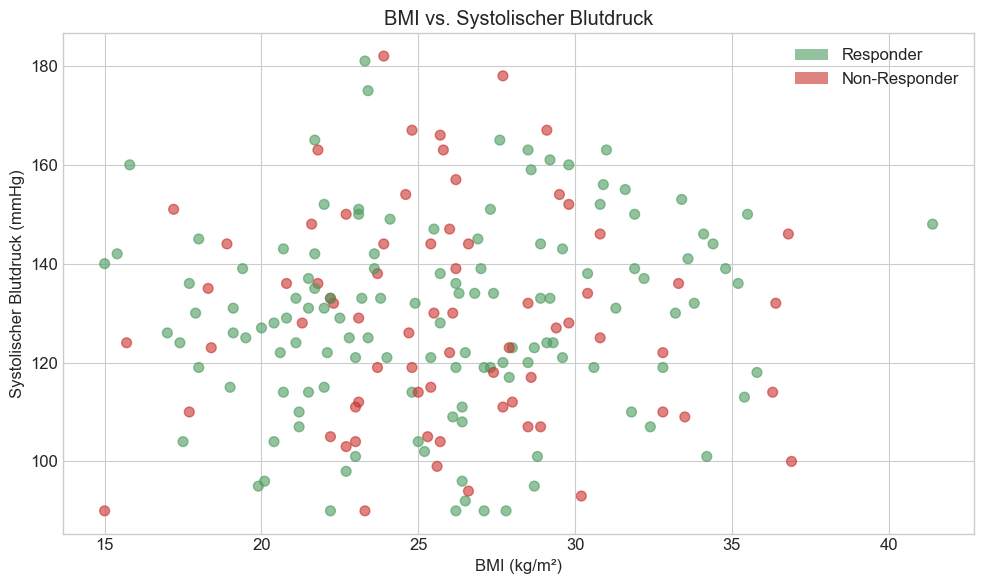

In [9]:
#| label: fig-bmi-bp
#| fig-cap: "BMI vs. Systolischer Blutdruck"

fig, ax = plt.subplots(figsize=(10, 6))

colors = df['response'].map({0: PRECISION_COLORS['danger'], 1: PRECISION_COLORS['success']})
scatter = ax.scatter(df['bmi'], df['blood_pressure_sys'], c=colors, alpha=0.6, s=50)

ax.set_xlabel('BMI (kg/m²)')
ax.set_ylabel('Systolischer Blutdruck (mmHg)')
ax.set_title('BMI vs. Systolischer Blutdruck')

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=PRECISION_COLORS['success'], alpha=0.6, label='Responder'),
    Patch(facecolor=PRECISION_COLORS['danger'], alpha=0.6, label='Non-Responder')
]
ax.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

/var/folders/86/1tbdyg3s44g1lgs131g58ds40000gn/T/ipykernel_6349/2274890046.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0].boxplot([groups['A'], groups['B'], groups['Placebo']],


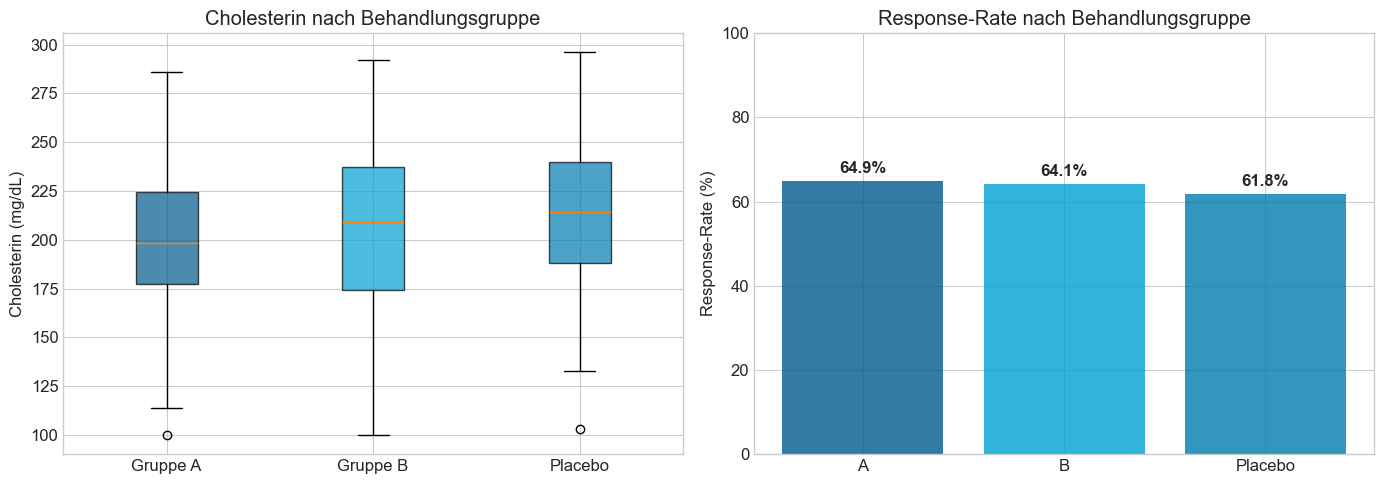

In [10]:
#| label: fig-treatment-comparison
#| fig-cap: "Behandlungsgruppen-Vergleich"

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot: Cholesterin nach Behandlungsgruppe
groups = df.groupby('treatment_group')['cholesterol'].apply(list)
bp = axes[0].boxplot([groups['A'], groups['B'], groups['Placebo']], 
                      labels=['Gruppe A', 'Gruppe B', 'Placebo'],
                      patch_artist=True)
colors_box = [PRECISION_COLORS['primary'], PRECISION_COLORS['accent'], PRECISION_COLORS['secondary']]
for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[0].set_ylabel('Cholesterin (mg/dL)')
axes[0].set_title('Cholesterin nach Behandlungsgruppe')

# Barplot: Response-Rate nach Behandlungsgruppe
response_rate = df.groupby('treatment_group')['response'].mean() * 100
bars = axes[1].bar(response_rate.index, response_rate.values, 
                   color=[PRECISION_COLORS['primary'], PRECISION_COLORS['accent'], PRECISION_COLORS['secondary']],
                   alpha=0.8)
axes[1].set_ylabel('Response-Rate (%)')
axes[1].set_title('Response-Rate nach Behandlungsgruppe')
axes[1].set_ylim(0, 100)

for bar, val in zip(bars, response_rate.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
                 f'{val:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Zusammenfassung

### Wichtige Erkenntnisse:

1. **Datensatz-Größe:** 200 Patienten
2. **Altersverteilung:** Normalverteilt um ~55 Jahre
3. **Geschlechterverteilung:** Ausgeglichen (52% M, 48% F)
4. **Response-Rate:** ~65% über alle Gruppen

In [11]:
# Zusammenfassende Statistiken
summary = {
    'Gesamtanzahl Patienten': len(df),
    'Durchschnittsalter': f"{df['age'].mean():.1f} Jahre",
    'Anteil männlich': f"{(df['gender'] == 'M').mean() * 100:.1f}%",
    'Durchschnittlicher BMI': f"{df['bmi'].mean():.1f} kg/m²",
    'Response-Rate gesamt': f"{df['response'].mean() * 100:.1f}%"
}

for key, value in summary.items():
    print(f'{key}: {value}')

Gesamtanzahl Patienten: 200
Durchschnittsalter: 53.9 Jahre
Anteil männlich: 50.5%
Durchschnittlicher BMI: 25.8 kg/m²
Response-Rate gesamt: 64.0%
